In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aminer-academic-citation-dataset/dblp-ref-3.json
/kaggle/input/aminer-academic-citation-dataset/AMiner-Coauthor.txt
/kaggle/input/aminer-academic-citation-dataset/dblp-ref-2.json
/kaggle/input/aminer-academic-citation-dataset/citation-network2.txt
/kaggle/input/aminer-academic-citation-dataset/dblp-ref-0.json
/kaggle/input/aminer-academic-citation-dataset/AMiner-Author.txt
/kaggle/input/aminer-academic-citation-dataset/dblp-ref-1.json


In [2]:
import pandas as pd

# List of file paths
file_paths = [
    "/kaggle/input/aminer-academic-citation-dataset/dblp-ref-0.json",
    #"/kaggle/input/aminer-academic-citation-dataset/dblp-ref-1.json",
    #"/kaggle/input/aminer-academic-citation-dataset/dblp-ref-2.json",
    #"/kaggle/input/aminer-academic-citation-dataset/dblp-ref-3.json"
]

# Read and concatenate all files
dfs = [pd.read_json(path, lines=True) for path in file_paths]
df_all = pd.concat(dfs, ignore_index=True)

# Show basic info
print(df_all.shape)
df_all.head()


(1000000, 8)


,abstract,authors,n_citation,references,title,venue,year,id
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,00127ee2-cb05-48ce-bc49-9de556b93346
1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,NaN,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011,00338203-9eb3-40c5-9f31-cbac73a519ec
4,NaN,"[Giovanna Guerrini, Isabella Merlo]",2,NaN,Reasonig about Set-Oriented Methods in Object ...,,1998,0040b022-1472-4f70-a753-74832df65266


In [3]:
df_null=df_all.copy()

In [4]:
df_null.isnull().sum()

abstract      246354
authors            0
n_citation         0
references    138520
title              0
venue              0
year               0
id                 0
dtype: int64

In [5]:
df_null.dropna(inplace=True)

In [6]:
df_null.isnull().sum()

abstract      0
authors       0
n_citation    0
references    0
title         0
venue         0
year          0
id            0
dtype: int64

In [7]:
df_null.shape

(709207, 8)

In [8]:
df_null = df_null[
    df_null['references'].notna() & 
    (df_null['references'] != '') & 
    (df_null['references'].apply(lambda x: x != []))
]


In [9]:
df_null.drop_duplicates(subset=['id'], keep='first', inplace=True)
df_null.reset_index(drop= True,inplace = True)

In [10]:
df_id=df_null[['id','title','abstract','n_citation','references']]
df_id

,id,title,abstract,n_citation,references
0,00127ee2-cb05-48ce-bc49-9de556b93346,Preliminary Design of a Network Protocol Learn...,The purpose of this study is to develop a lear...,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b..."
1,001c58d3-26ad-46b3-ab3a-c1e557d16821,A methodology for the physically accurate visu...,This paper describes the design and implementa...,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714..."
2,001c8744-73c4-4b04-9364-22d31a10dbf1,"Comparison of GARCH, Neural Network and Suppor...",This article applied GARCH model instead AR or...,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b..."
3,00a119c4-d367-4607-b3c8-b237f2971bff,Identifying Psychological Theme Words from Emo...,Recent achievements in Natural Language Proces...,0,"[84d47128-58d0-4187-aa44-389fde7d5c83, e0dce69..."
4,00c85316-bddf-4bcb-93f5-097adadd73c2,Relational Abstract Interpretation of Higher O...,Most applications of the abstract interpretati...,50,"[6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208, 7bb71af..."
...,...,...,...,...,...
655474,4aa64046-89ff-43ad-97ee-1615cd959134,Delineation of malignant skin tumors by hypers...,A new non-invasive method for delineation of l...,9,"[2bf40147-087c-4fb1-89e3-6e7a91d19b97, 6876ea7..."
655475,4aa672c2-c5e6-469d-b168-2056474cf47f,Distributed workflow management: the TEAM model,"In the last few years, workflow systems have b...",10,"[02763555-4d84-49fa-b6aa-00171c832dc0, 4be4595..."
655476,4aa67ed9-6b28-4ed4-a180-13d3a0dc0a59,Class-D Audio Amplifiers with Negative Feedback,There are many different designs for audio amp...,19,[3059f971-f49e-4a49-a1e5-82ea4e8f6879]
655477,4aa692aa-2448-436c-a809-81b54e5f2f66,A simulation study exploring the role of cultu...,This paper proposes a language acquisition fra...,5,"[207c4e1c-52f4-4737-9cd9-1db86b33d580, 55c81e3..."


In [11]:
# df_title = df_id['title']
# df_title.to_csv('title.csv', index=False)


In [12]:
# from IPython.display import FileLink

# FileLink('title.csv')


In [13]:
df_id=df_id.iloc[100000:400000].copy()
df_id

,id,title,abstract,n_citation,references
100000,0fd70f02-8563-4f61-911a-e2837b1c4135,A comparison between two representatives of a ...,In this paper we consider two existing methods...,6,"[0778dca9-2e4b-4496-ac99-b5cba6730875, 0bfc35b..."
100001,0fd79488-7a9d-4dde-a8a5-5256193f32f8,Metrics for Grid Applicability: A Distributed ...,The distribution of computational load among s...,50,[22594fe7-8c1d-4717-a97f-63e58de2ae07]
100002,0fd7ef6e-7e6e-41a0-b79b-796b0079425b,Multiuser detection in multipath non-Gaussian ...,This paper addresses the problem of multiuser ...,0,"[2efcf391-6634-4990-a2b9-b3efabb5fdde, b52aefd..."
100003,0fd87461-8bce-40e6-848f-49c8348e77c2,Space-Economical Algorithms for Finding Maxima...,We show space-economical algorithms for findin...,37,"[144a58e6-306c-4d8d-ae33-2146da221689, 17359b1..."
100004,0fd87a54-367d-4185-a2d3-1a9cb471c61a,BPM-in-the-Large – Towards a Higher Level of A...,Business Process Management (BPM) has gained t...,50,"[06b073fd-0617-40d2-9295-9373b7ed4e90, 08e139c..."
...,...,...,...,...,...
399995,cb2f9fb0-6e78-4f0c-bbd3-d2ade4e72b27,Creative computing for decision making: Combin...,Our research aims to improve the Traditional D...,0,"[1c795ea8-881c-4840-8539-7dee0eddc5ab, 2dd289c..."
399996,cb2fb552-9285-4765-a079-3ccd214b648b,Predicting Energy Demand Peak Using M5 Model T...,Predicting energy demand peak is a key factor ...,3,"[043c36b8-498a-428c-baf9-9ba2b48512f2, 652c1b2..."
399997,cb2fc9ad-1189-4651-9b01-08667b481f6c,Data-driven depth map refinement via multi-sca...,Depth maps captured by consumer-level depth ca...,27,"[031bbeb0-4dc1-46f9-9984-109c3b3eefae, 0e859ce..."
399998,cb2ff562-f24c-4953-9419-96800971070b,Data Driven Condition Monitoring of Wind Power...,Along with the rapid growth of the wind energy...,2,"[0bcc4f37-d1c8-4fc1-9e0a-a5bc41be9d14, 19ed289..."


In [14]:
df_id1=df_id.copy()

In [15]:
df_id.head()

,id,title,abstract,n_citation,references
100000,0fd70f02-8563-4f61-911a-e2837b1c4135,A comparison between two representatives of a ...,In this paper we consider two existing methods...,6,"[0778dca9-2e4b-4496-ac99-b5cba6730875, 0bfc35b..."
100001,0fd79488-7a9d-4dde-a8a5-5256193f32f8,Metrics for Grid Applicability: A Distributed ...,The distribution of computational load among s...,50,[22594fe7-8c1d-4717-a97f-63e58de2ae07]
100002,0fd7ef6e-7e6e-41a0-b79b-796b0079425b,Multiuser detection in multipath non-Gaussian ...,This paper addresses the problem of multiuser ...,0,"[2efcf391-6634-4990-a2b9-b3efabb5fdde, b52aefd..."
100003,0fd87461-8bce-40e6-848f-49c8348e77c2,Space-Economical Algorithms for Finding Maxima...,We show space-economical algorithms for findin...,37,"[144a58e6-306c-4d8d-ae33-2146da221689, 17359b1..."
100004,0fd87a54-367d-4185-a2d3-1a9cb471c61a,BPM-in-the-Large – Towards a Higher Level of A...,Business Process Management (BPM) has gained t...,50,"[06b073fd-0617-40d2-9295-9373b7ed4e90, 08e139c..."


In [16]:
pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 20.1 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


Using device: cuda


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Embeddings added to FAISS index.


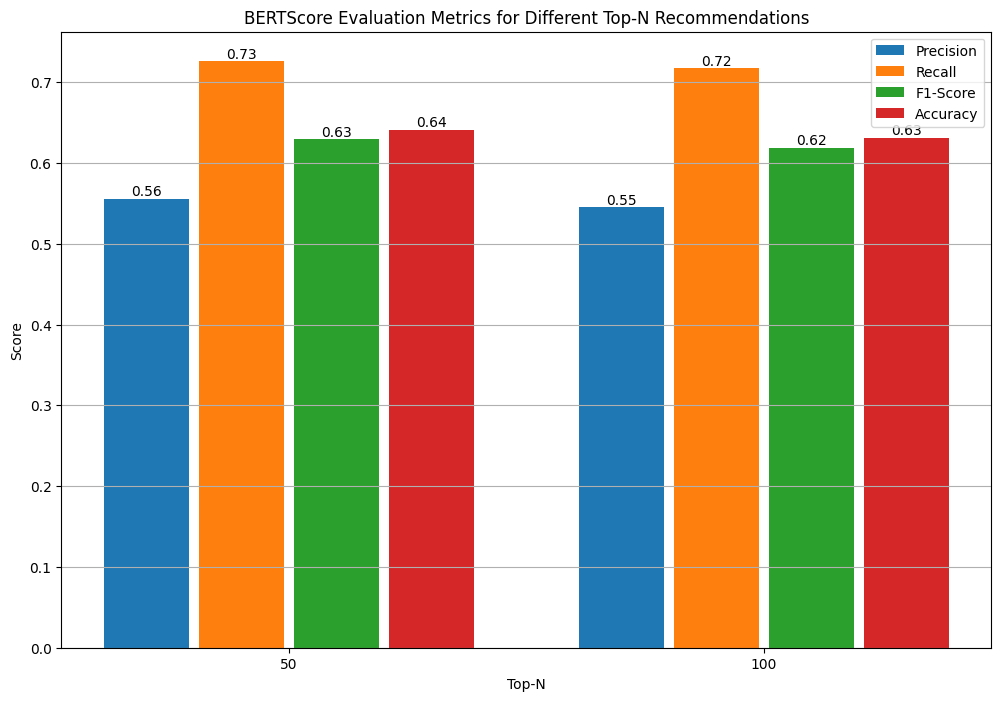

In [18]:
import torch
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from scipy.spatial.distance import cosine
from sklearn.metrics import accuracy_score
import bert_score
import matplotlib.pyplot as plt
import faiss

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the SciBERT model and tokenizer
model_name = "allenai/scibert_scivocab_uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)

# Function to get embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    with torch.no_grad():
        embeddings = model(**inputs).last_hidden_state.mean(dim=1)
    return embeddings

# Process the dataframe
df_id['title'] = df_id['title'].astype(str)
df_id['abstract'] = df_id['abstract'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
df_id['combined_text'] = df_id['title'] + " " + df_id['abstract']
df_id['text_embeddings'] = df_id['combined_text'].apply(lambda x: get_embeddings(x).squeeze().cpu().numpy().tolist())

# Prepare embeddings and metadata
text_embeddings = df_id["text_embeddings"].tolist()
ids = df_id["id"].tolist()
text_metadatas = df_id[["title", "abstract"]].to_dict(orient="records")

# Create a FAISS index (assuming 768-dim embeddings from SciBERT)
dimension = 768
index = faiss.IndexFlatL2(dimension)

# Add embeddings to FAISS index
index.add(np.array(text_embeddings).astype('float32'))
print("Embeddings added to FAISS index.")

# Function to compute cosine similarity
def compute_cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

# Function to find similar texts using cosine similarity with FAISS
def find_similar_texts_cosine(user_input, input_paper_id, top_n=5):
    user_embedding = get_embeddings(user_input).squeeze().cpu().numpy()
    user_embedding = np.array([user_embedding]).astype('float32')

    distances, indices = index.search(user_embedding, top_n + 10)  # retrieve more in case of input ID filter
    similar_ids = []
    for idx, dist in zip(indices[0], distances[0]):
        sim_id = ids[idx]
        if sim_id != input_paper_id:
            similarity = 1 / (1 + dist)  # convert L2 distance to similarity proxy
            similar_ids.append((sim_id, similarity))
        if len(similar_ids) == top_n:
            break
    return similar_ids

# Placeholder re-ranking
def re_rank_results(similar_texts):
    return similar_texts

def find_and_rerank_similar_texts(user_input, input_paper_id, top_n=5):
    similar_texts = find_similar_texts_cosine(user_input, input_paper_id, top_n)
    return re_rank_results(similar_texts)

def recommend_papers(user_input, input_paper_id, top_n=5):
    return find_and_rerank_similar_texts(user_input, input_paper_id, top_n)

# BERTScore evaluation
def evaluate_bertscore(user_input, recommended_texts):
    references = [user_input] * len(recommended_texts)
    candidates = [text for _, text in recommended_texts]
    
    P, R, F1 = bert_score.score(candidates, references, model_type=model_name, lang="en", rescale_with_baseline=True)
    return P.mean().item(), R.mean().item(), F1.mean().item()

# Full recommendation and evaluation
def recommend_and_evaluate(user_input, input_paper_id, top_n=5):
    recommended_papers = recommend_papers(user_input, input_paper_id, top_n)
    recommended_texts = [(paper_id, df_id[df_id["id"] == paper_id]["combined_text"].values[0]) for paper_id, _ in recommended_papers]
    
    precision, recall, f1 = evaluate_bertscore(user_input, recommended_texts)
    accuracy = (precision + recall) / 2
    return precision, recall, f1, accuracy

# Example input
user_input = "Robust stability analysis of uncertain hopfield neural networks with markov switching"
input_paper_title = user_input.strip().lower()
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]

# Top-N values
top_n_values = [50,100]

results = {"Top-N": [], "Precision": [], "Recall": [], "F1-Score": [], "Accuracy": []}

# Evaluate for each Top-N
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Results DataFrame
results_df = pd.DataFrame(results)

# Plotting function
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')
    
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Plot the metrics
plot_metrics_for_top_n(results_df)


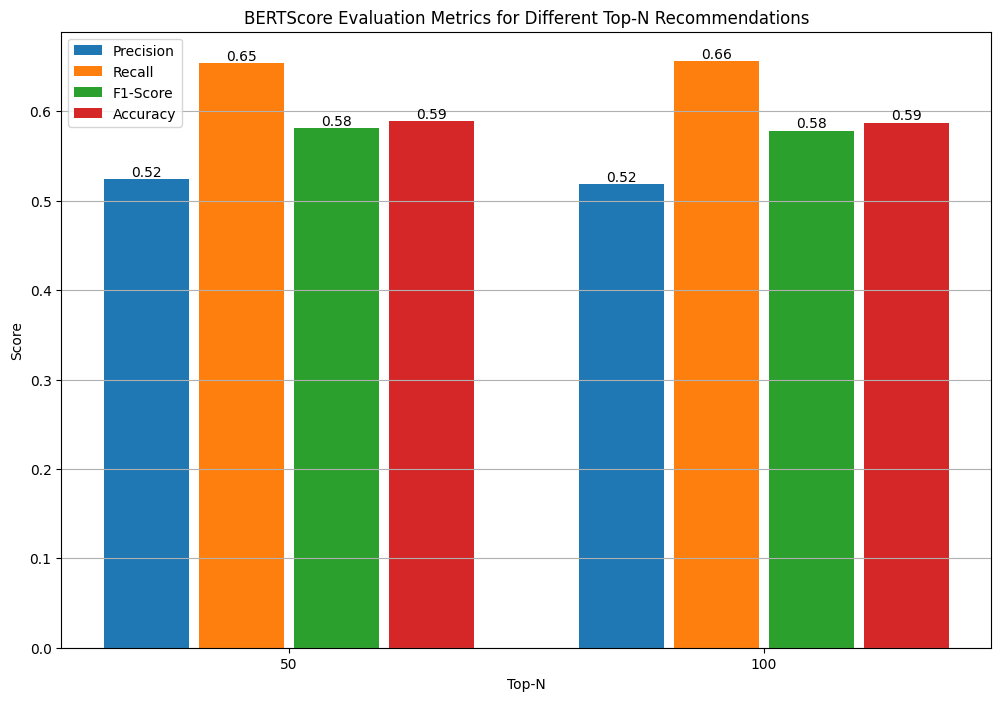

In [21]:
# Example input
user_input = "A General Framework for Automatic Termination Analysis of Logic Programs"
input_paper_title = user_input.strip().lower()
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]

# Top-N values
top_n_values = [50,100]

results = {"Top-N": [], "Precision": [], "Recall": [], "F1-Score": [], "Accuracy": []}

# Evaluate for each Top-N
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Results DataFrame
results_df = pd.DataFrame(results)

# Plotting function
def plot_metrics_for_top_n(results_df, filename="/kaggle/working/evaluation_metrics.png"):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')
    
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')

    # Save the plot as a .png file in the Kaggle environment
    plt.savefig(filename, format='png')
    
    # Optionally, show the plot
    plt.show()

# Plot and save the metrics
plot_metrics_for_top_n(results_df, filename="/kaggle/working/evaluation_metrics.png")



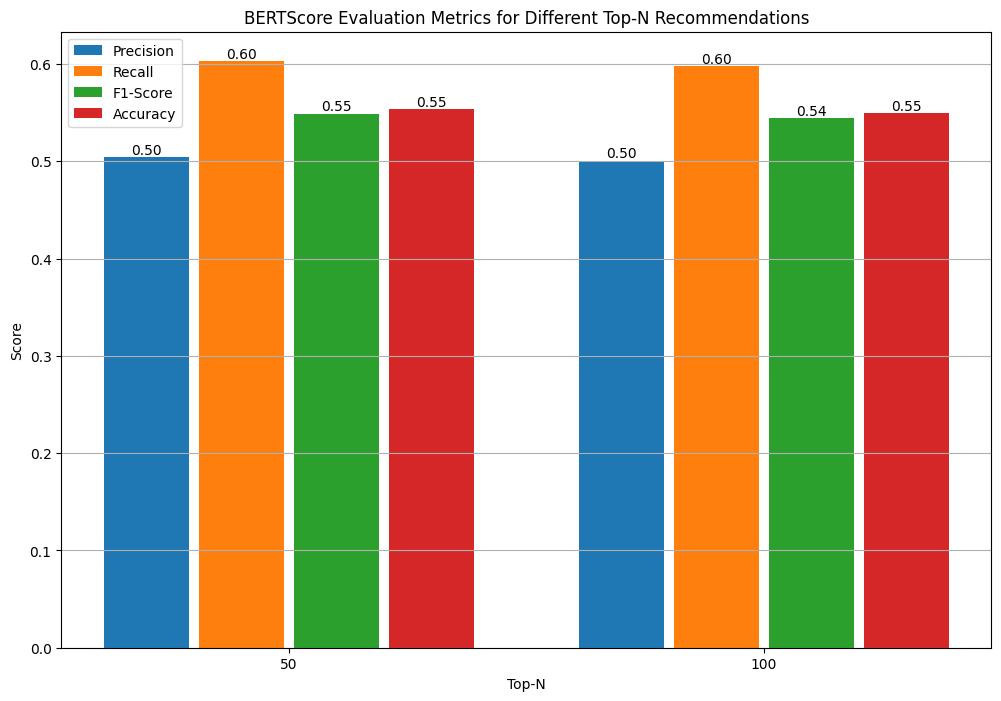

In [20]:
# Example input
user_input = "Extensions for 3d graphics rendering engine used for direct tessellation of spline surfaces"
input_paper_title = user_input.strip().lower()
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]

# Top-N values
top_n_values = [50,100]

results = {"Top-N": [], "Precision": [], "Recall": [], "F1-Score": [], "Accuracy": []}

# Evaluate for each Top-N
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Results DataFrame
results_df = pd.DataFrame(results)

# Plotting function
def plot_metrics_for_top_n(results_df, filename="/kaggle/working/evaluation_metrics.png"):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')
    
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')

    # Save the plot as a .png file in the Kaggle environment
    plt.savefig(filename, format='png')
    
    # Optionally, show the plot
    plt.show()

# Plot and save the metrics
plot_metrics_for_top_n(results_df, filename="/kaggle/working/evaluation_metrics.png")



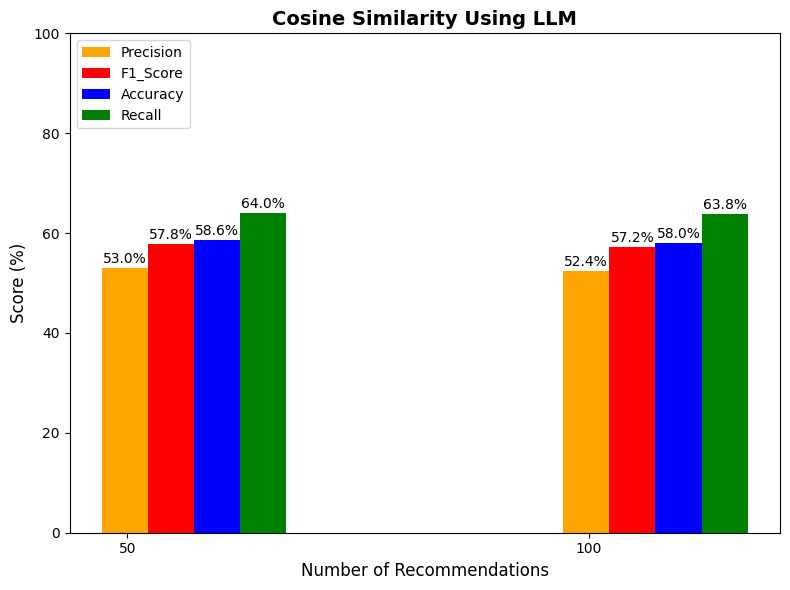

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Input data
# Input data
results = {
    'Recommendations': [ 50,100],
    'Accuracy': [
        [0.55, 0.59, 0.64, 0.58, 0.57],
        [0.55, 0.59, 0.63, 0.57, 0.56]
        
    ],
    'Precision': [
        [0.50, 0.52, 0.56, 0.53, 0.54],
        [0.50, 0.52, 0.55, 0.52, 0.53]
        
    ],
    'Recall': [
        [0.60, 0.65, 0.73, 0.61, 0.61],
        [0.60, 0.66, 0.72, 0.61, 0.60]
        
    ],
    'F1_Score': [
        [0.55, 0.58, 0.63, 0.56, 0.57],
        [0.54, 0.58, 0.62, 0.56, 0.56]
    ]
}
# Compute averages for each metric at each recommendation level and convert to percentages
averaged_results = {metric: [np.mean(values) * 100 for values in metrics] for metric, metrics in results.items() if metric != 'Recommendations'}

# Define colors and order
metrics_order = ['Precision', 'F1_Score', 'Accuracy', 'Recall']
colors = {'Accuracy': 'blue', 'Precision': 'orange', 'Recall': 'green', 'F1_Score': 'red'}

# Plotting the bars
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(results['Recommendations']))
width = 0.1  # Width of each bar

# Plot bars for each recommendation level
for i, rec in enumerate(results['Recommendations']):
    for j, metric in enumerate(metrics_order):
        value = averaged_results[metric][i]
        bar = ax.bar(x[i] + j * width, value, width, label=metric if i == 0 else "", color=colors[metric])

        # Add labels above each bar
        ax.text(x[i] + j * width, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

# Set x-axis labels and title
ax.set_xticks(x + width * 0.05)
ax.set_xticklabels(results['Recommendations'])
ax.set_xlabel("Number of Recommendations", fontsize=12)
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_title("Cosine Similarity Using LLM", fontsize=14, fontweight='bold')

# Set y-axis scale from 0 to 100
ax.set_ylim(0, 100)

# Improve legend display
ax.legend(fontsize=10, loc="upper left")

plt.tight_layout()
plt.show()
